In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

1.Visualizacion del DataSet

In [146]:
casas :pd.DataFrame = pd.read_csv('Casitas.csv')
casas.drop(casas.index[9501:99499], inplace=True)
casas.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


2.Graficos de distribucion de datos

count    9.501000e+03
mean     1.065205e+07
std      1.050547e+07
min      1.600000e+04
25%      2.600000e+06
50%      7.960000e+06
75%      1.500000e+07
85%      2.200000e+07
90%      2.600000e+07
100%     4.450000e+07
max      4.450000e+07
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9501 non-null   int64  
 1   property_type  9501 non-null   object 
 2   price          9501 non-null   int64  
 3   location       9501 non-null   object 
 4   city           9501 non-null   object 
 5   baths          9501 non-null   int64  
 6   purpose        9501 non-null   object 
 7   bedrooms       9501 non-null   int64  
 8   Area_in_Marla  9501 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 668.2+ KB


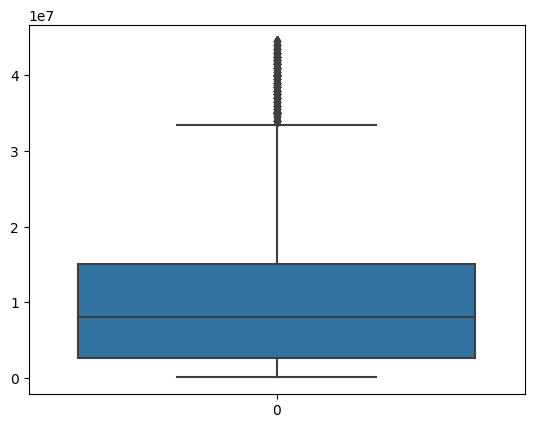

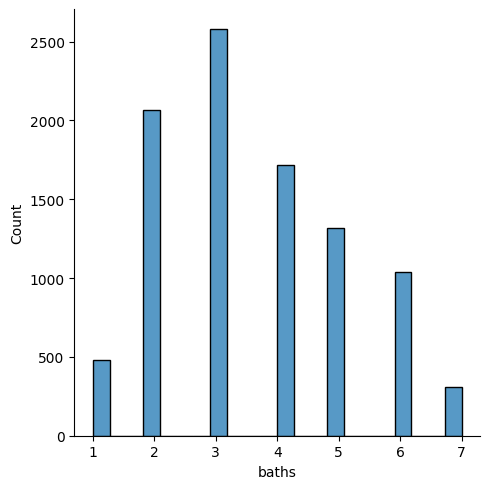

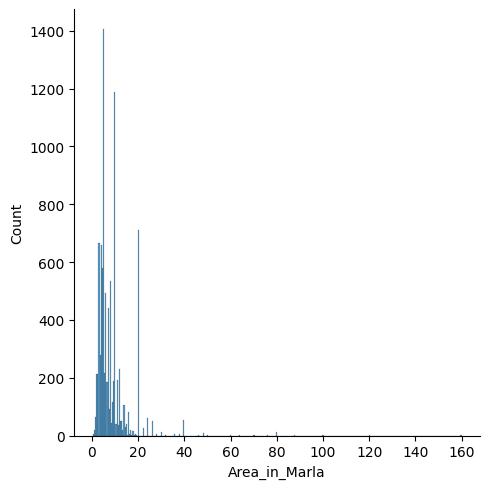

In [147]:
#hacemos graficos de difusion de los precios, baños y area en marla
sns.boxplot(casas.price)
sns.displot(casas.baths)
sns.displot(casas.Area_in_Marla)
print(casas.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))#saber como estan los precios
casas.info()#saber que tipos de datos tenemos

3.Decidimos elegir a predecir el "purpose" como atributo categorico y "price" como numerico

In [148]:
#El atributo numerico sera el precio
N_cols = ['Area_in_Marla','baths','bedrooms']#usaremos area en marla, baños y dormitorios para predecir precio
NX = casas[N_cols]
Ny = casas.price
NX_train, NX_test, Ny_train, Ny_test = train_test_split(NX, Ny, test_size=0.25,random_state = 0)

#atributo categorico es el tipo de propiedad, el cual es binario
le = preprocessing.LabelEncoder()
le.fit(casas.property_type)#encodearemos el purpose a un valor numerico
C_cols = ['price', 'baths']#vamos a predecir el tipo de propiedad en base al numero de los baños y el precio
CX = casas[C_cols]
Cy = le.transform(casas.property_type)
CX_train, CX_test, Cy_train, Cy_test = train_test_split(CX, Cy, test_size=0.25, random_state=0)#Hacemos train test split aunque despues vayamos a usar cross validation

5.Regresion Lineal

In [149]:
LinReg = linear_model.LinearRegression()
#LinReg.fit(NX_train,Ny_train)
#LinReg_Ny_pred = LinReg.predict(NX_test) Esto lo dejo como una alternativa para entrenar el modelo aunque haya decidido usar cross val score
score_LinReg = cross_val_score(LinReg, NX, Ny, cv=5)#cross val score entrena y evalua el modelo con 5 folds(ya estaba en default igual)
print("Puntaje de %0.2f con una desviacion tipica de %0.2f" % (score_LinReg.mean(), score_LinReg.std()))# printeamos el promedio de la precision de todos los folds

Puntaje de 0.22 con una desviacion tipica de 0.04


Regresor de arbol de decision

In [150]:
TreeReg = DecisionTreeRegressor()
score_TreeReg = cross_val_score(TreeReg, NX, Ny, cv=10)
print("Puntaje de %0.2f con una desviacion tipica de %0.2f" % (score_TreeReg.mean(), score_TreeReg.std()))

Puntaje de 0.24 con una desviacion tipica de 0.05


En este caso se puede evaluar usando cross validation con 10 folds, pero tambien se puede usar una matriz para despues hacer una heatmap con ella. El mejor modelo de predicion se decide mediante el puntaje de precision que obtiene. En esta ocasion el modelo de regresion lineal tiene un 22% de precision con un 4% de desviacion tipica y el arbol de decision regresor tiene un 24% de precision con un 6% de desviacion.

6.Regresion Logistica

In [151]:
LogReg = linear_model.LogisticRegression(random_state = 0)#en este caso no vamos a mezclar los datos
#LogReg.fit(CX_train, Cy_train)
#LogReg_Cy_pred = LogReg.predict(CX_test)
score_LogReg = cross_val_score(LogReg, CX, Cy, cv=5)
print("Puntaje de %0.2f con una desviacion tipica de %0.2f" % (score_LogReg.mean(), score_LogReg.std()))

Puntaje de 0.64 con una desviacion tipica de 0.00


Clasificador de arbol de decision

In [152]:
TreeClf = DecisionTreeClassifier(random_state = 0)
#TreeClf.fit(CX_train,Cy_train)
#TreeClf_Cy_pred = TreeClf.predict(CX_test)
score_TreeClf = cross_val_score(TreeClf, CX, Cy, cv=5)
print("Puntaje de %0.2f con una desviacion tipica de %0.2f" % (score_TreeClf.mean(), score_TreeClf.std()))

Puntaje de 0.67 con una desviacion tipica de 0.02


Hay diferentes maneras de evaluar los arboles de decision, esto puede ser mediante matrizes, heatmaps, metrics.accuracy_score y usando validacion cruzada. El "mejor arbol" se elige mediante la precision que este tiene al comparar sus predicciones con los valores de testeo. Ambos modelos mediante la validacion cruzada presentan una precision similar, pero el clasificador logra ser mas preciso pero tambien mas disperso en sus predicciones.

7.
-  **Holdout Cross Validation**

> Este metodo divide el dataset inicial en dos, el de testing y el de training. El training dataset sera mas grande que el de testing y se entrenara el modelo con el dataset de training y se testeara con el de test.

> Una desventaja de este es que el dataset de test puede contener caracteristicas esenciales que no se podran entrenar, por lo cual su score bajara considerablemente.

> A pesar de ello, este metodo ofrece una simplicidad que hace que sea facil de entender y usar

- **K-fold Cross Validation**

> Este metodo entrena el modelo utilizando todo el dataset. Despues divide la muestra de datos en 'k' número de folds. A partir de esto, estos folds se convierten en los conjuntos de datos de prueba que luego se utilizan para probar la validación de un modelo uno por uno.

> Una ventaja es que este modelo es imparcial e inclusivo ya que capacita y prueba casi todos los subconjuntos.

- **Leave-One-Out Cross Validation**

> Este es una variante del metodo Leave-P-Out, que consiste en usar "data points". El numero de data points sera "n" se usara para separar el training dataset del test datset, pero esta variante usara solo un data point para testear y el resto para training.

> Por esta razon se puede decir que LOO es mas apropiado al estar usando un dataset pequeño ya que puede entrenarse mejor por cada iteracion.

> Pero, con datasets mas grandes, este metodo tomara mucho tiempo en entrenarse y exigira mucho computacionalmente.

**Conclusion**
> En este trabajo se eligio dataset con 4 atributos categoricos y 4 numericos. Se hizo un analisi exploratorio del dataset. Se entrenaron y evaluaron 4 modelos distintos los cuales el clasificador de arbol de decision y la regresion logistica lograron tener un puntaje positivo, pero en ambos casos los resultados entre los dos eran parecidos. Se decidio optar por la cross validation para la evaluacion y se compararon 3 modelos distintos de este, de los cuales se termino K-fold.